# EDA

1. Tipos de datos
  - Cuantitativos
  - Cualitativos
2. Librerías relevantes
  - numpy
  - pandas
  - scipy
  - matplotlib, seaborn

3. Comprensión de los datos
  - Información relevante
  - Nombres de las columnas
  - Índice
  - Descripción inicial de los datos

3. Limpieza de los datos
  - Datos faltantes
  - Outliers
  - Duplicados
  - Datos inconsistentes
  - Manipulación de los datos:
    - Tipos de datos
    - Uso de memoria

4. Análisis descriptivo de los datos
  - Medidas de tendencia central
    - Media, mediana, moda
  - Medidas de dispersión
    - Desviación estándar, varianza, coeficiente de variación, cuantiles
  - Medidas de correlación
    - Pearson, Spearman
  - Análisis univariado vs. análisis multivariado
  - Descripción de datos categóricos

5. Visualización de la información
  - Análisis univariado
  - Análisis bivariado
  - Análisis multivariado

6. Pruebas de hipótesis

In [212]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74108 entries, 0 to 74107
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74108 non-null  object 
 1   is_canceled                     74108 non-null  int64  
 2   lead_time                       74108 non-null  int64  
 3   arrival_date_year               74108 non-null  int64  
 4   arrival_date_month              74108 non-null  object 
 5   arrival_date_week_number        74108 non-null  int64  
 6   arrival_date_day_of_month       74108 non-null  int64  
 7   stays_in_weekend_nights         74108 non-null  int64  
 8   stays_in_week_nights            74108 non-null  int64  
 9   adults                          74108 non-null  int64  
 10  children                        74104 non-null  float64
 11  babies                          74108 non-null  int64  
 12  meal                            

In [213]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print(df[col].dtypes)
  print('---'*10)
  


hotel
['Resort Hotel', 'City Hotel']
Categories (2, object): ['City Hotel', 'Resort Hotel']
category
------------------------------
is_canceled
[0 1]
int64
------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165


In [ ]:
df_fil = df.filter(['hotel','is_canceled','arrival_date_month','arrival_date_week_number','adults','children','babies','country','required_car_parking_spaces'])

In [ ]:
df_fil.shape

(74108, 10)

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74108 entries, 0 to 74107
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        74108 non-null  object 
 1   is_canceled                  74108 non-null  int64  
 2   arrival_date_month           74108 non-null  object 
 3   arrival_date_week_number     74108 non-null  int64  
 4   adults                       74108 non-null  int64  
 5   children                     74104 non-null  float64
 6   babies                       74108 non-null  int64  
 7   country                      73622 non-null  object 
 8   required_car_parking_spaces  74107 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 5.1+ MB


In [215]:
df_fil.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
cat = df_fil.select_dtypes('object').columns
for col in cat:
  df_fil[cat] = df_fil[cat].astype('category')

In [ ]:
dmonth = {'January':1,
          'February':2,
          'March':3,
          'April':4,
          'May':5,
          'June':6,
          'July':7,
          'August':8,
          'September':9,
          'October':10,
          'November':11,
          'December':12}

In [ ]:
df_fil['month_number'] = [dmonth[i] for i in df_fil['arrival_date_month']] 

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74108 entries, 0 to 74107
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        74108 non-null  category
 1   is_canceled                  74108 non-null  int64   
 2   arrival_date_month           74108 non-null  category
 3   arrival_date_week_number     74108 non-null  int64   
 4   adults                       74108 non-null  int64   
 5   children                     74104 non-null  float64 
 6   babies                       74108 non-null  int64   
 7   country                      73622 non-null  category
 8   required_car_parking_spaces  74107 non-null  float64 
 9   month_number                 74108 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 4.2 MB


In [ ]:
df_fil

In [ ]:
int_cols = df_fil.select_dtypes('int64').columns
int_cols

Index(['is_canceled', 'arrival_date_week_number', 'adults', 'babies',
       'month_number'],
      dtype='object')

In [ ]:
for col in int_cols:
  df_fil[col] = df_fil[col].astype('int16')

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74108 entries, 0 to 74107
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        74108 non-null  category
 1   is_canceled                  74108 non-null  int16   
 2   arrival_date_month           74108 non-null  category
 3   arrival_date_week_number     74108 non-null  int16   
 4   adults                       74108 non-null  int16   
 5   children                     74104 non-null  float64 
 6   babies                       74108 non-null  int16   
 7   country                      73622 non-null  category
 8   required_car_parking_spaces  74107 non-null  float64 
 9   month_number                 74108 non-null  int16   
dtypes: category(3), float64(2), int16(5)
memory usage: 2.1 MB


In [ ]:
df_fil.select_dtypes('float64').describe()

,children,required_car_parking_spaces
count,74104.000000,74107.000000
mean,0.109373,0.076835
std,0.411902,0.270554
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,10.000000,8.000000


In [ ]:
float_cols = df_fil.select_dtypes('float64').columns

In [ ]:
for col in float_cols:
  df_fil[col] = df_fil[col].astype('float16')

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74108 entries, 0 to 74107
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        74108 non-null  category
 1   is_canceled                  74108 non-null  int16   
 2   arrival_date_month           74108 non-null  category
 3   arrival_date_week_number     74108 non-null  int16   
 4   adults                       74108 non-null  int16   
 5   children                     74104 non-null  float16 
 6   babies                       74108 non-null  int16   
 7   country                      73622 non-null  category
 8   required_car_parking_spaces  74107 non-null  float16 
 9   month_number                 74108 non-null  int16   
dtypes: category(3), float16(2), int16(5)
memory usage: 1.3 MB


In [221]:
df_fil.columns.str.lower()

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_week_number', 'adults', 'children', 'babies', 'country',
       'required_car_parking_spaces', 'month_number'],
      dtype='object')

In [ ]:
df_fil.isna().sum()

hotel                            0
is_canceled                      0
arrival_date_month               0
arrival_date_week_number         0
adults                           0
children                         4
babies                           0
country                        486
required_car_parking_spaces      1
month_number                     0
dtype: int64

In [ ]:
for col, por in ((df_fil.isna().sum() / df_fil.shape[0]) * 100).to_dict().items():
  print(f"En la columna '{col}' hace falta el {round(por,4)}% de los datos")

En la columna 'hotel' hace falta el 0.0% de los datos
En la columna 'is_canceled' hace falta el 0.0% de los datos
En la columna 'arrival_date_month' hace falta el 0.0% de los datos
En la columna 'arrival_date_week_number' hace falta el 0.0% de los datos
En la columna 'adults' hace falta el 0.0% de los datos
En la columna 'children' hace falta el 0.0054% de los datos
En la columna 'babies' hace falta el 0.0% de los datos
En la columna 'country' hace falta el 0.6558% de los datos
En la columna 'required_car_parking_spaces' hace falta el 0.0013% de los datos
En la columna 'month_number' hace falta el 0.0% de los datos


¿Qué hacer con los datos faltantes? Que lo último sea borrarlos.

1. Sustitución por un valor o estadístico representativo.
2. Eliminar filas.
3. Eliminar columnas.

In [ ]:
df_fil['children'].value_counts(dropna=False, normalize=True)

0.0     0.925811
1.0     0.039577
2.0     0.034139
3.0     0.000459
10.0    0.000013
Name: children, dtype: float64

In [ ]:
df_fil['children'] = df_fil['children'].fillna(0)

In [ ]:
df_fil.pivot_table(index='hotel',
                   columns='arrival_date_month',
                   values='children',
                   aggfunc='median')

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
hotel,,,,,,,,,,,,
City Hotel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Resort Hotel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_fil['required_car_parking_spaces'].value_counts(normalize=True, dropna=False)

0.0    0.923706
1.0    0.075903
2.0    0.000337
8.0    0.000027
3.0    0.000013
NaN    0.000013
Name: required_car_parking_spaces, dtype: float64

In [ ]:
df_fil['required_car_parking_spaces'] = df_fil['required_car_parking_spaces'].fillna(0)

In [ ]:
from statistics import mode

In [ ]:
mode(df_fil['country'])

'PRT'

In [ ]:
pivote = df_fil.pivot_table(index=['is_canceled','arrival_date_month'],
                   columns='hotel',
                   values='country',
                   aggfunc=mode)
pivote

hotel                          City Hotel Resort Hotel
is_canceled arrival_date_month                        
0           April                     FRA          PRT
            August                    PRT          PRT
            December                  PRT          PRT
            February                  FRA          PRT
            January                   PRT          PRT
            July                      PRT          PRT
            June                      FRA          GBR
            March                     PRT          PRT
            May                       AUT          GBR
            November                  PRT          PRT
            October                   PRT          GBR
            September                 PRT          GBR
1           April                     PRT          PRT
            August                    PRT          PRT
            December                  PRT          PRT
            February                  PRT          PRT
            January                   PRT          PRT
            July                      PRT          PRT
            June                      PRT          PRT
            March                     PRT          PRT
            May                       PRT          PRT
            November                  PRT          PRT
            October                   PRT          PRT
            September                 PRT          PRT

In [ ]:
pivote['City Hotel'][0]['October']

'PRT'

In [ ]:
def sus_paises(s):
  can = s['is_canceled']
  month = s['arrival_date_month']
  hotel = s['hotel']

  return pivote[hotel][can][month]

In [ ]:
df_fil.apply(sus_paises, axis=1)

0        PRT
1        PRT
2        PRT
3        PRT
4        PRT
        ... 
74103    PRT
74104    PRT
74105    PRT
74106    PRT
74107    PRT
Length: 74108, dtype: object

In [ ]:
df_fil['country'].value_counts(dropna=True)

PRT    35031
GBR     8581
ESP     5931
FRA     4049
DEU     2709
       ...  
SMR        1
PLW        1
LIE        1
CYM        1
RWA        1
Name: country, Length: 151, dtype: int64

In [ ]:
df_fil.isna().sum()

hotel                            0
is_canceled                      0
arrival_date_month               0
arrival_date_week_number         0
adults                           0
children                         0
babies                           0
country                        486
required_car_parking_spaces      0
month_number                     0
dtype: int64

In [ ]:
df_fil.dropna(inplace=True)

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73622 entries, 0 to 74107
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        73622 non-null  category
 1   is_canceled                  73622 non-null  int16   
 2   arrival_date_month           73622 non-null  category
 3   arrival_date_week_number     73622 non-null  int16   
 4   adults                       73622 non-null  int16   
 5   children                     73622 non-null  float16 
 6   babies                       73622 non-null  int16   
 7   country                      73622 non-null  category
 8   required_car_parking_spaces  73622 non-null  float16 
 9   month_number                 73622 non-null  int16   
dtypes: category(3), float16(2), int16(5)
memory usage: 1.8 MB


In [ ]:
df_fil.duplicated().sum()

61352

In [ ]:
df_fil.drop_duplicates(inplace=True)

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12270 entries, 0 to 73710
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        12270 non-null  category
 1   is_canceled                  12270 non-null  int16   
 2   arrival_date_month           12270 non-null  category
 3   arrival_date_week_number     12270 non-null  int16   
 4   adults                       12270 non-null  int16   
 5   children                     12270 non-null  float16 
 6   babies                       12270 non-null  int16   
 7   country                      12270 non-null  category
 8   required_car_parking_spaces  12270 non-null  float16 
 9   month_number                 12270 non-null  int16   
dtypes: category(3), float16(2), int16(5)
memory usage: 317.3 KB


In [ ]:
for i in float_cols:
  df_fil[i] = df_fil[i].astype('int16')

In [ ]:
df_num = df_fil.select_dtypes(exclude='category')

In [ ]:
from scipy.spatial.distance import mahalanobis

In [ ]:
mahal_distances = []

for row in df_num.to_numpy():
  mahal_distances.append(mahalanobis(row, df_num.mean(), np.linalg.inv(np.cov(df_num.values.T))))

In [ ]:
k = df_fil.shape[0]

df_fil['mahal_distances'] = mahal_distances
df_fil['p_value'] = 1 - st.chi2.cdf(df_fil['mahal_distances'], k-1)

In [ ]:
df_fil = df_fil[df_fil['p_value'] > 0.05]

In [ ]:
df_fil.drop(columns=['mahal_distances','p_value'],inplace=True)

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12270 entries, 0 to 73710
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        12270 non-null  category
 1   is_canceled                  12270 non-null  int16   
 2   arrival_date_month           12270 non-null  category
 3   arrival_date_week_number     12270 non-null  int16   
 4   adults                       12270 non-null  int16   
 5   children                     12270 non-null  int16   
 6   babies                       12270 non-null  int16   
 7   country                      12270 non-null  category
 8   required_car_parking_spaces  12270 non-null  int16   
 9   month_number                 12270 non-null  int16   
dtypes: category(3), int16(7)
memory usage: 317.3 KB


In [ ]:
for col in df_fil.columns:
  print(col)
  print(df_fil[col].unique())
  print('---'*10)

hotel
['Resort Hotel', 'City Hotel']
Categories (2, object): ['City Hotel', 'Resort Hotel']
------------------------------
is_canceled
[0 1]
------------------------------
arrival_date_month
['July', 'August', 'September', 'October', 'November', ..., 'February', 'March', 'April', 'May', 'June']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November',
                          'October', 'September']
------------------------------
arrival_date_week_number
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
------------------------------
adults
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
------------------------------
children
[ 0  1  2 10  3]
------------------------------
babies
[ 0  1  2 10]
------------------------------
country
['PRT', 'GBR', 'USA', 'ESP', 'IRL', ..., 'GNB', 'MNE', 'UMI', 'MYT', 'FRO']
Length: 151
Categories (1

In [ ]:
df_fil.describe()

,is_canceled,arrival_date_week_number,adults,children,babies,required_car_parking_spaces,month_number
count,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000
mean,0.480685,26.815159,1.952649,0.368215,0.037816,0.153953,6.467645
std,0.499647,13.941744,1.114428,0.699685,0.212199,0.378984,3.154053
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,27.000000,2.000000,0.000000,0.000000,0.000000,7.000000
75%,1.000000,37.000000,2.000000,0.000000,0.000000,0.000000,9.000000
max,1.000000,53.000000,55.000000,10.000000,10.000000,8.000000,12.000000


In [ ]:
df_fil[['hotel','arrival_date_month','country']].describe()

,hotel,arrival_date_month,country
count,12270,12270,12270
unique,2,12,151
top,Resort Hotel,August,PRT
freq,6646,1527,1696


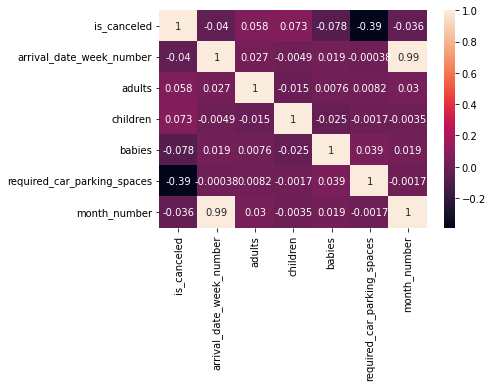

In [ ]:
sns.heatmap(df_fil.corr(), annot=True)

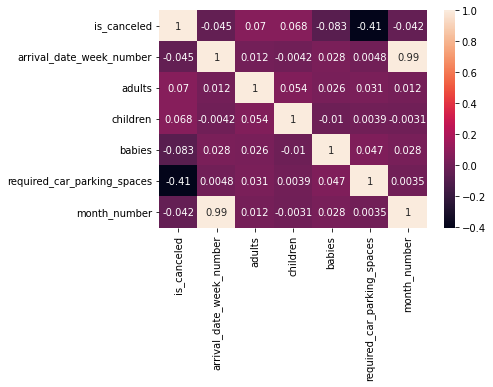

In [ ]:
sns.heatmap(df_fil.corr(method='spearman'), annot=True)

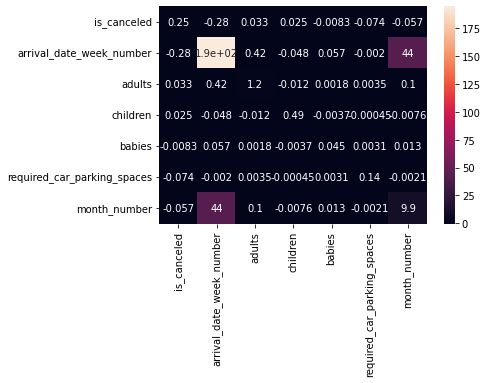

In [ ]:
sns.heatmap(df_fil.cov(), annot=True)

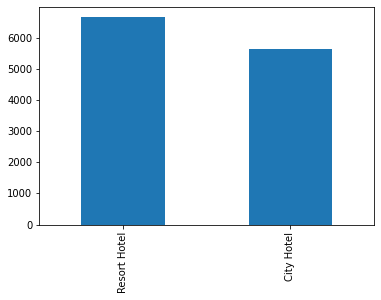

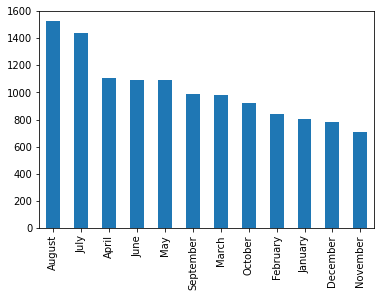

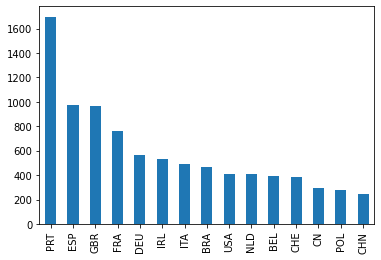

In [ ]:
for col in df_fil.select_dtypes('category').columns:
  df_fil[col].value_counts().plot(kind='bar')
  if col == 'country':
    df_fil[col].value_counts()[:15].plot(kind='bar')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


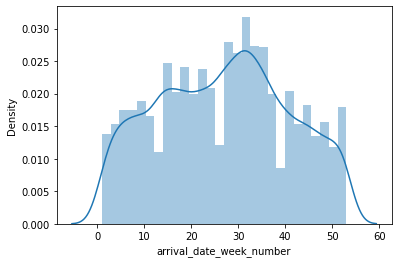

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


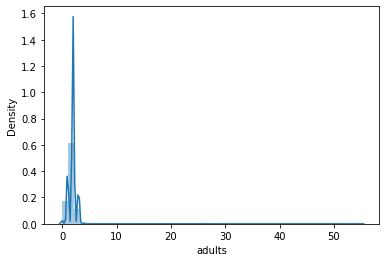

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


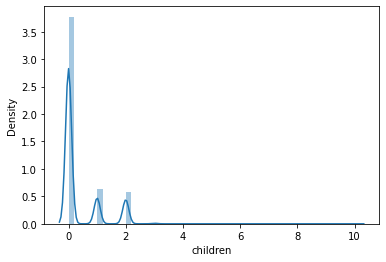

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


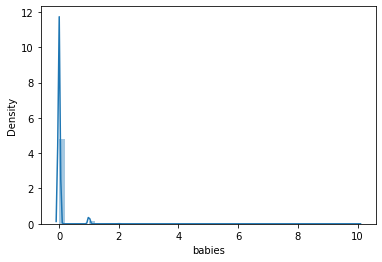

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


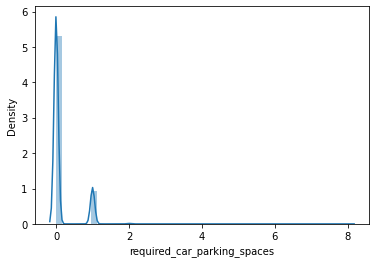

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


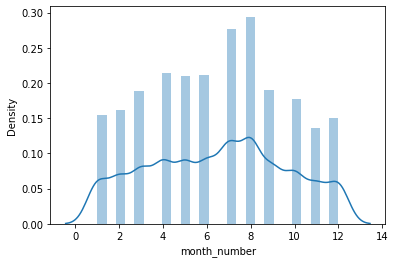

In [ ]:
for col in df_fil.select_dtypes(exclude='category').columns[1:]:

  sns.distplot(df_fil[col])
  plt.show()